In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Загрузка данных
data = pd.read_csv('student_perfomance.csv')
def transform_grade(grade):
    if grade >= 0 and grade <= 5:
        return round(60 + grade)
    elif grade >= 6 and grade <= 10:
        return round(65 + (grade - 6) * 2)
    elif grade >= 11 and grade <= 20:
        return round(78 + (grade - 11) * 2.375)

# Применим функцию к столбцу G1
data['G1'] = data['G1'].apply(transform_grade)

In [ ]:
data.head(40)

,Medu,Fedu,studytime,failures,schoolsup,higher,absences,G1
0,4,4,2,0,yes,yes,6,65
1,1,1,2,0,no,yes,4,65
2,1,1,2,3,yes,yes,10,67
3,4,2,3,0,no,yes,2,88
4,3,3,2,0,no,yes,4,65
5,4,3,2,0,no,yes,10,88
6,2,2,2,0,no,yes,0,80
7,4,4,2,0,yes,yes,6,65
8,3,2,2,0,no,yes,0,90
9,3,4,2,0,no,yes,0,85


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Medu       395 non-null    int64
 1   Fedu       395 non-null    int64
 2   studytime  395 non-null    int64
 3   failures   395 non-null    int64
 4   schoolsup  395 non-null    int64
 5   higher     395 non-null    int64
 6   absences   395 non-null    int64
 7   G1         395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB


# Предобработка данных

In [ ]:
data.isnull().sum()

Medu         0
Fedu         0
studytime    0
failures     0
schoolsup    0
higher       0
absences     0
G1           0
dtype: int64

In [ ]:
# Замена значений 'no' на 0 и 'yes' на 1
data['schoolsup'] = data['schoolsup'].replace({'no': 0, 'yes': 1})
data['higher'] = data['higher'].replace({'no': 0, 'yes': 1})

In [ ]:
data.head()

,Medu,Fedu,studytime,failures,schoolsup,higher,absences,G1
0,4,4,2,0,1,1,6,65
1,1,1,2,0,0,1,4,65
2,1,1,2,3,1,1,10,67
3,4,2,3,0,0,1,2,88
4,3,3,2,0,0,1,4,65


In [ ]:
# отделяем признаки от целевых полей
X = data.drop(['G1'], axis=1)
y = data['G1']

# разделяем на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Размеры обучающего набора X: (316, 7)
Размеры тестового набора X: (79, 7)
Размеры обучающего набора y: (316,)
Размеры тестового набора y: (79,)


78     69
371    85
248    63
55     69
390    71
       ..
364    80
82     67
114    71
3      88
18     65
Name: G1, Length: 79, dtype: int64

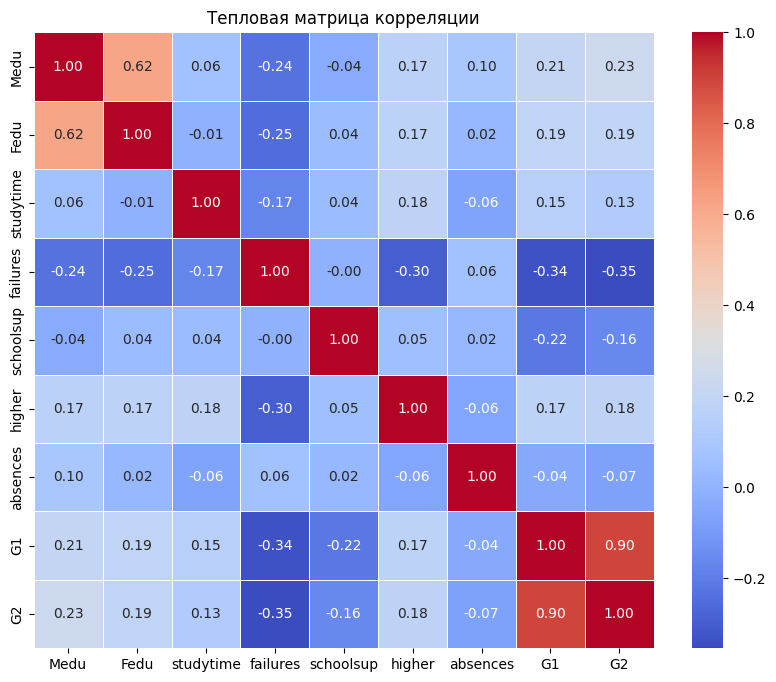

In [ ]:
corr_matrix = data.corr()

# тепловая матрица корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая матрица корреляции')
plt.show()

In [ ]:

# Создаем объект модели линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратичная ошибка (MSE): 77.47734551585457
Коэффициент детерминации (R^2): 0.10070912509448193


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Создаем модель случайного леса
random_forest = RandomForestRegressor(random_state=42)

# Обучаем модель на обучающем наборе данных
random_forest.fit(X_train, y_train)

# Предсказываем значения для тестового набора данных
y_pred_rf = random_forest.predict(X_test)

# Оцениваем производительность модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Среднеквадратичная ошибка (MSE) случайного леса:", mse_rf)
print("Коэффициент детерминации (R^2) случайного леса:", r2_rf)

Среднеквадратичная ошибка (MSE) случайного леса: 80.50585822695942
Коэффициент детерминации (R^2) случайного леса: 0.06555673535399154


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Создаем модель K ближайших соседей
knn_model = KNeighborsRegressor(n_neighbors=68)

# Обучаем модель на обучающих данных
knn_model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = knn_model.predict(X_test)

# Вычисляем среднеквадратичную ошибку (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE) KNN модели:", mse)

Среднеквадратичная ошибка (MSE) KNN модели: 81.04418334720337


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Задаем список значений параметра k, которые хотим попробовать
param_grid = {'n_neighbors': range(2, 101)}

# Создаем экземпляр модели KNN
knn = KNeighborsClassifier()

# Создаем объект GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Запускаем поиск наилучшего значения параметра
grid_search.fit(X_train, y_train)

# Выводим наилучший параметр и среднеквадратичную ошибку
print("Наилучший параметр k:", grid_search.best_params_)
print("Среднеквадратичная ошибка (MSE):", -grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Наилучший параметр k: {'n_neighbors': 68}
Среднеквадратичная ошибка (MSE): 89.52415674603176


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
